# Kinds of tests

## Kinds of tests

By number of samples:
- One-sample: just one sample. Example: testing whether a coin is symmetric (probability of success equals probability of failure).
- Two-sample: two independent samples. Example: A/B testing.
- Paired: two dependent samples. Example: treatment effect, when the same participants are tested more than once.

By hypothesis type:
- Non-parametric: either we know the distribution entirely (goodness-of-fit) or we test its parameters
- Parametric: we know the distribution up to a **parametric** family of distributions

# Permutation test

## Permutation test

Permutation test is a **non-parametric** **two-sample** test.

Suppose that we have samples $X = (X_1, \ldots, X_n) \sim p(\cdot)$ and $Y = (Y_1, \ldots, Y_m) \sim q(\cdot)$. We'd like to test whether the samples come from the same distribution:
$$
H_0: p \equiv q
$$
This test works with **any** test statistic $T(\cdot)$. Denote the joined sample $Z = (X_1, \ldots X_n, Y_1, \ldots, Y_m)$. Intuitively, we would like to asses how likely it is to have the partition of $Z$ into $X$ and $Y$ the way it is observed.

Let's shuffle $Z$ randomly and compute a statistic of the shuffled sample $T(\tilde{Z})$. Let's do so for all possible permutations and collect $(n+m)!$ values of test statistics. Now, the p-value of the test will be simply the fraction of cases with a more extreme value of the statistic:
$$
p\rm{-value} = \frac{1}{(n+m)!} \sum_{\text{all permutations }\tilde{Z} \text{ of }Z} \mathbb{I}\rm{nd}\left( T(\tilde{Z}) > T(Z) \right)
$$

- Advantages: non-parametric, any test statistic
- Disadvantages: computationally hard

In [1]:
import numpy as np
import itertools as it
from scipy.special import factorial

In [2]:
X = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
Y = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201])
Z = np.concatenate([X, Y])

n, m = len(X), len(Y)

alpha = 0.05

In [3]:
def T(z):
    x, y = z[:, :n], z[:, n:]
    x_mean, y_mean = np.mean(x, axis=1), np.mean(y, axis=1)
    return np.abs(x_mean - y_mean)

In [4]:
t_obs = T(np.expand_dims(Z, 0))

In [5]:
factorial(n + m)

6402373705728000.0

In [6]:
B = 1e6
permutations = []
for i, permutation in enumerate(it.permutations(Z)):
    permutations.append(permutation)
    if i > B: break
statistics = T(np.array(permutations))
pvalue = np.sum(statistics > t_obs) / factorial(B)
print("Rejected" if pvalue < alpha else "Not rejected")

Rejected


# Multinomial test

## Multinomial test

The multinomial test is the test of the null hypothesis that the parameters of a multinomial distribution equal specified values. It is a **one-sample** **non-parametric** test.

Suppose that we have sample $X = (X_1, \ldots, X_n) \sim Mult(\theta)$ with $k$ categories. We'd like to test whether our parameters $\theta$ equal specified values:
$$
H_0: \theta = \theta_0
$$
The statistic for the test is simply the multinomial probability:
$$
T(X) = n! \sum_{i=1}^k \frac{\theta_i^{X_i}}{X_i!}
$$

Now, the p-value of the test will be simply the probability of observing a sample (there is a finite number of possible multinomial samples of size $n$) less likely that the given one:
$$
p\rm{-value} = \sum_{Y: T(Y) \leqslant T(X)} T(Y)
$$

- Advantages: non-parametric, simple
- Disadvantages: computationally hard

# Likelihood ratio test

## Likelihood ratio test

Likelihood ratio test is a **parametric** **one-sample** test.

Suppose that we have sample $X = (X_1, \ldots, X_n) \sim p(\theta)$ and $\theta \in \Theta$. We'd like to test wheter $\theta$ belongs to a subset of $\Theta$:
$$
\begin{aligned}
H_0 & : \theta \in \Theta_0 \subset \Theta \\
H_1 & : \theta \in \Theta_1 = \Theta \backslash \Theta_0
\end{aligned}
$$

The test statistic is given as follows (most common example, will lead to $\chi^2$ distribution):
$$
\lambda(X) = 2 \log \Lambda(X) = 2 \log \left( \frac{\sup\limits_{\theta \in \Theta} L(X, \theta)}{\sup\limits_{\theta \in \Theta_0} L(X, \theta)} \right) = 2 \log \left( \frac{L(X, \hat{\theta}^{MLE})}{L(X, \hat{\theta}^{MLE}_{0})} \right)
$$

We reject the null hypothesis, if $\lambda(X) \leqslant c$, where $c$ is defined from
$$
\int\limits_{y: \lambda(y) \leqslant c} L(x, \theta) \leqslant \alpha
$$

Many tests can be derived from likelihood ratio test.

## Likelihood ratio test: example

Suppose that we have sample $X = (X_1, \ldots, X_n) \sim \mathcal{N}(\theta_1, \theta_2^2)$.
$$
\begin{aligned}
H_0 & : \theta_1 = \theta_{0} \\
H_1 & : \theta_1 \neq \theta_{0}
\end{aligned}
$$
We'l need to compute
$$
\Lambda(X) = \frac{L(X, \hat{\theta}^{MLE})}{L(X, \hat{\theta}^{MLE}_{0})}
$$
Numerator:
$$
\begin{aligned}
L(X, \theta_1, \theta_2) & = \frac{1}{(2 \pi)^{n/2} \theta_2^n} \exp \left(- \frac{1}{2 \theta_2^2} \sum_{i=1}^n (X_i - \theta_1)^2 \right) = \\
& = \frac{1}{(2 \pi)^{n/2} \theta_2^n} \exp \left(- \frac{n}{2 \theta_2^2} \left(s^2 + (\bar{X} - \theta_1)^2 \right) \right)
\end{aligned}
$$
MLE estimates are $\hat{\theta}_1 = \bar{X}, \hat{\theta}_2^2 = s^2$. The supremum of likelihood is:
$$
\sup\limits_{\theta \in \Theta} L(X, \theta_1, \theta_2) = \left( 2 \pi e s^2\right)^{-n/2}
$$

## Likelihood ratio test: example

Denominator:
$$
L(X, \theta_1, \theta_2) = \frac{1}{(2 \pi)^{n/2} \theta_2^n} \exp \left(- \frac{1}{2 \theta_2^2} \sum_{i=1}^n (X_i - \theta_0)^2 \right)
$$

MLE estimate is
$$
\hat{\theta}_2^2 = \frac1n \sum_{i=1}^n (X_i - \theta_0)^2 = s_0^2
$$

The supremum of likelihood is:
$$
\sup\limits_{\theta \in \Theta} L(X, \theta_1, \theta_2) = \left( 2 \pi e s_0^2\right)^{-n/2}
$$

## Likelihood ratio test: example

The statistic for this case will be $\lambda(X) = \Lambda(X)^{-1}$.
$$
\lambda(X) = \frac{\left( 2 \pi e s_0^2\right)^{-n/2}}{\left( 2 \pi e s^2\right)^{-n/2}} = \left(\frac{s^2 + (\bar{X} - \theta_0)^2}{s^2} \right)^{-n/2}
$$

Note that $\bar{X} \sim \mathcal{N}(\theta_0, \frac{\theta_2^2}{n})$, therefore $\frac{\bar{X} - \theta_0}{\theta_2} \sqrt{n} \sim \mathcal{N}(0, 1)$. Therefore,
$$
t^2 = \left( \frac{\frac{\bar{X} - \theta_0}{\theta_2} \sqrt{n}}{\sqrt{\frac{\frac{s^2}{\theta_2^2}n}{n-1}}} \right)^2 \sim St(n-1)
$$

We have,
$$
\lambda(X) = \left(1 + \frac{1}{n-1} t^2\right)^{-n/2} \leqslant c \Leftrightarrow |t| \geqslant \tilde{c}
$$

## Tests comparison for multinomial data

1. Multinomial test: exact, works best on small samples, hard
2. Likelihood ratio test: not exact, works best on large samples, produces type I errors (false positives), simplier
3. Pearson $\chi^2$ test: not exact, works best on medium-sized samples, produces type I errors (false positives), simplier

# Student t-test

## Student t-test

It is a **parametric** test. There are all kinds of t-test: one-sample, two-sample, paired test. We'll cover one-sample test for now.

Suppose that we have sample $X = (X_1, \ldots, X_n) \sim \mathcal{N}(\mu, \sigma^2)$. We'd like to test wheter $\mu$ equals a specified value:
$$
\begin{aligned}
H_0 & : \mu = \mu_0 \\
H_1 & : \mu \neq \mu_0
\end{aligned}
$$

The test statistic is given by
$$
T(X) = \frac{\bar{X} - \mu_0}{S / \sqrt{n}} \sim St(n-1)
$$

In [7]:
from sklearn.datasets import load_wine
import pandas as pd

In [8]:
wine = load_wine()
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

In [9]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<AxesSubplot:ylabel='Frequency'>

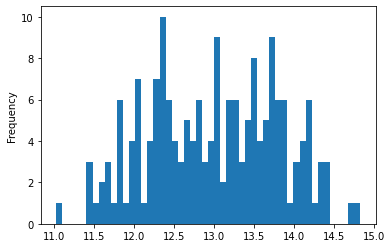

In [10]:
df["alcohol"].plot.hist(bins=50)

In [11]:
import scipy.stats as sts

In [12]:
X = df["alcohol"].values
n = len(X)

tdistr = sts.t(n-1)
alpha = 0.05

mu_0 = 13.0

X_bar = X.mean()
S = X.std(ddof=1)

T = np.sqrt(n) * (X_bar - mu_0) / S
pvalue = 2 * tdistr.sf(T)

print("Rejected" if pvalue < alpha else "Not rejected")

Not rejected


In [13]:
res = sts.ttest_1samp(X, mu_0, alternative='two-sided')

In [14]:
print("Rejected" if res.pvalue < alpha else "Not rejected")

Not rejected


## Student t-test

Suppose that we have samples $X = (X_1, \ldots, X_n) \sim \mathcal{N}(\mu_1, \sigma_1^2)$ and $Y = (Y_1, \ldots, Y_m) \sim \mathcal{N}(\mu_2, \sigma_2^2)$. We'd like to test whether the distributions of these samples share the same means:
$$
\begin{aligned}
H_0 & : \mu_1 = \mu_2 \\
H_1 & : \mu_1 \neq \mu_2
\end{aligned}
$$

The test statistic is given by
$$
T(X) = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S_1^2}{n} + \frac{S_2^2}{m}}} \sim St\left(\frac{\left(\frac{S_1^2}{n} + \frac{S_2^2}{m}\right)^2}{\left(\frac{S_1^2}{n}\right)^2 \frac{1}{n-1} + \left(\frac{S_2^2}{m}\right)^2 \frac{1}{m-1}}\right)
$$

In [15]:
X = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
Y = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201])

alpha = 0.05

In [16]:
res = sts.ttest_ind(X, Y, equal_var=False)
print("Rejected" if res.pvalue < alpha else "Not rejected")

Rejected


# Wilcoxon signed-rank test

## Wilcoxon signed-rank test

It is a **non-parametric** **paired** test.

Suppose that we have samples $X = (X_1, \ldots, X_n) \sim p(\cdot)$ and $Y = (Y_1, \ldots, Y_n) \sim q(\cdot)$. We'd like to test whether the distributions of these samples share the same means:
$$
\begin{aligned}
H_0 & : \mu_1 = \mu_2 \\
H_1 & : \mu_1 \neq \mu_2
\end{aligned}
$$

The statistic is:
$$
W(X, Y) = \sum_{i=1}^{N_{r}} R_i \cdot \rm{sgn}(y_i - x_i)
$$
where $\rm{sgn}(\cdot)$ is signum function, $N_r$ is the corrected sample size (without samples with equal measurements), $R_i$ is the rank of the difference in ascending order.

It follows a tabulated distribution.

In [17]:
X = np.array([176, 163, 152, 155, 156, 178, 160, 164, 169, 155, 122, 144])
Y = np.array([168, 215, 172, 200, 191, 197, 183, 174, 176, 155, 115, 163])

<AxesSubplot:ylabel='Frequency'>

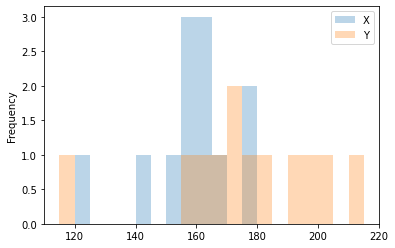

In [18]:
pd.DataFrame({"X": X, "Y": Y}).plot.hist(bins=20, alpha=0.3)

In [19]:
alpha = 0.05

In [20]:
res = sts.wilcoxon(X, Y)
print("Rejected" if res.pvalue < alpha else "Not rejected")

Rejected


/Users/nickstulov/.virtualenvs/msai/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


# Multiple testing

## Multiple testing

Probability of making a mistake in one of $k$ tests with $\alpha$ confidence level:
$$
1 - (1 - \alpha)^k
$$

In [22]:
alpha = 0.05
print(1 - (1 - alpha) ** 10)
print(1 - (1 - alpha / 10) ** 10)

0.4012630607616213
0.048889869534228136
